In [1]:
import sys, os
sys.path.append(os.path.abspath("C:/users/karmeni1/project/lm-mem/"))
sys.path.append(os.path.abspath("C:/users/karmeni1/project/lm-mem/fig"))
sys.path.append(os.path.abspath("C:/users/karmeni1/project/lm-mem/src/data"))
sys.path.append(os.path.abspath("C:/users/karmeni1/project/lm-mem/src/output"))
sys.path.append(os.path.abspath("C:/users/karmeni1/project/lm-mem/src"))
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle
from stimuli import prefixes, prompts
import json

In [2]:
# set some matplotlib options to handle text better
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rc("font", size=11)
# set some seaborn defaults
#sns.set(font_scale=1.3)
#sns.set_style("white")  # use the simple white style

In [3]:
home_dir = os.path.join(os.environ['homepath'], "project", "lm-mem")
data_dir = os.path.join(home_dir, "data", "output_cshift")
savedir = os.path.join(home_dir, "fig", "cshift")
table_savedir = os.path.join(home_dir, "tables")
savefigs = True

## Read scenario 1 data

In [4]:
data_rnn = pd.read_csv(os.path.join(data_dir, "output_rnn_a-10_sce1.csv"), sep="\t", index_col=None)
data_rnn.rename(columns={"word":"token"}, inplace=True)

data_gpt = pd.read_csv(os.path.join(data_dir, "output_gpt2_a-10_sce1.csv"), sep="\t", index_col=0)

data_gpt["model"] = "gpt-2"
data_rnn["model"] = "lstm"

C:\Users\karmeni1\Miniconda3\envs\ptorch1.6\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Check the data

In [5]:
# show that the original
sel = (data_gpt.list_len==5) & (data_gpt.prompt_len==8) & (data_gpt.context=="intact") & (data_gpt.list=="random") & (data_gpt.second_list=="permute") & (data_gpt.marker.isin([1, 3]))
d = data_gpt.loc[sel]

In [6]:
# show original and target lists for stimulus input 11
stimid=11
d.loc[d.stimid==stimid, ["token", "marker", "model", "second_list"]]

,token,marker,model,second_list
2476204,costume,1,gpt-2,permute
2476205,pleasure,1,gpt-2,permute
2476206,pattern,1,gpt-2,permute
2476207,leader,1,gpt-2,permute
2476208,culture,1,gpt-2,permute
2476231,culture,3,gpt-2,permute
2476232,pleasure,3,gpt-2,permute
2476233,leader,3,gpt-2,permute
2476234,costume,3,gpt-2,permute
2476235,pattern,3,gpt-2,permute


In [7]:
# show that the original
sel = (data_rnn.list_len==5) & (data_rnn.prompt_len==8) & (data_rnn.context=="intact") & (data_rnn.list=="random") & (data_rnn.second_list=="permute") & (data_rnn.marker.isin([1, 3]))
d = data_rnn.loc[sel]

In [8]:
d.loc[d.stimid==stimid, ["token", "marker", "model", "second_list"]]

,token,marker,model,second_list
2301634,costume,1,lstm,permute
2301635,pleasure,1,lstm,permute
2301636,pattern,1,lstm,permute
2301637,leader,1,lstm,permute
2301638,culture,1,lstm,permute
2301661,culture,3,lstm,permute
2301662,pleasure,3,lstm,permute
2301663,leader,3,lstm,permute
2301664,costume,3,lstm,permute
2301665,pattern,3,lstm,permute


# Design figures

In [9]:
#wrapper function
def plot_example(x, y, markers, xlabels, ylabel, fh, fw, title):

    f, a = plt.subplots(figsize=(fw, fh))

    a.plot(x, y, marker=".", markerfacecolor="white", linestyle="--", linewidth=1)
    
    x_rect = np.where(l==l[m==3][0])[0]
    y_rect = a.get_ylim()[0]
                      
    for i, xloc in enumerate(x_rect):             
        a.add_patch(Rectangle(xy=(xloc-0.5, y_rect), width=len(l[m==1]), height=a.get_ylim()[-1]+0.5, 
                               edgecolor=None, facecolor="tab:blue", alpha=0.15))
        
    a.set_xticks(x);
    a.set_xticklabels(l, rotation=40, fontsize=5, ha="right");

    bluewords = np.isin(m, [1, 3])

    [t.set_color("tab:blue") for i, t in enumerate(a.xaxis.get_ticklabels()) if bluewords[i]]

    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.set(ylabel=ylabel, title=title);
    
    return f, a

In [10]:
# common fig properties
w, h, w_disp, h_disp = 7, 0.8, 17, 3

### Select data (GPT-2 example)

In [11]:
# pick a random sentence
rng = np.random.RandomState(123)
sentid = rng.randint(low=1, high=21)

In [12]:
sel = (data_gpt.prompt_len==8) & \
      (data_gpt.list_len==10) & \
      (data_gpt.second_list=="repeat") & \
      (data_gpt.context=="intact") & \
      (data_gpt.list=="random") & \
      (data_gpt.stimid.isin([sentid])) & \
      (data_gpt.model_id=="a-10") & \
      (~data_gpt.token.isin([" ", "<|endoftext|>"]))
data = data_gpt.loc[sel].copy()

In [13]:
x = data.loc[data.stimid==sentid].reset_index().index.values
y = data.loc[data.stimid==sentid].surp.to_numpy()
m = data.loc[data.stimid==sentid].marker.to_numpy()
l = data.loc[data.stimid==sentid].token.to_numpy()

### Plot figure (GPT-2)

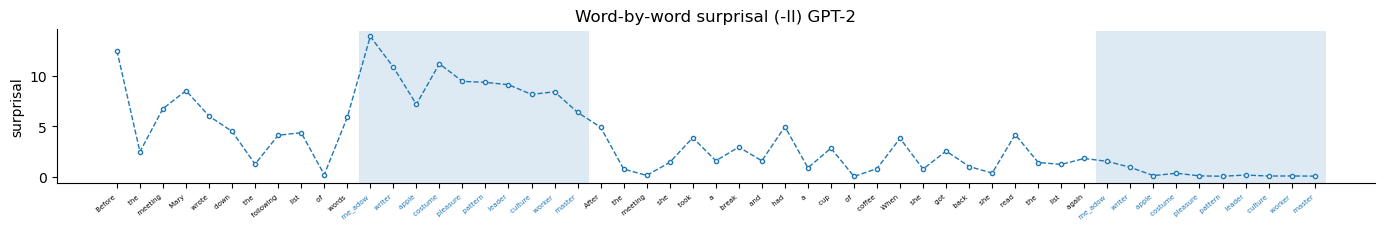

In [14]:
with plt.style.context("default"):
    f, a = plot_example(x=x, y=y, markers=m, xlabels=l, ylabel="surprisal", fh=2, fw=w_disp, title="Word-by-word surprisal (-ll) GPT-2")

In [15]:
if savefigs:
    f.set_size_inches(w=w, h=h)
    f.savefig(os.path.join(savedir, "example_gpt2.pdf"), transparent=True, dpi=300, bbox_inches="tight")
    f.savefig(os.path.join(savedir, "example_gpt2.png"), dpi=300, bbox_inches="tight")

### Select data (RNN example)

In [16]:
sel = (data_rnn.prompt_len==8) & \
      (data_rnn.list_len==10) & \
      (data_rnn.second_list=="repeat") & \
      (data_rnn.context=="intact") & \
      (data_rnn.list=="random") & \
      (data_rnn.model_id=="a-10") & \
      (data_rnn.stimid.isin([sentid]))
data = data_rnn.loc[sel].copy()

In [17]:
x = data.loc[data.stimid==sentid].reset_index().index.values
y = data.loc[data.stimid==sentid].surp.to_numpy()
m = data.loc[data.stimid==sentid].marker.to_numpy()
l = data.loc[data.stimid==sentid].token.to_numpy()

### Plot (RNN example)

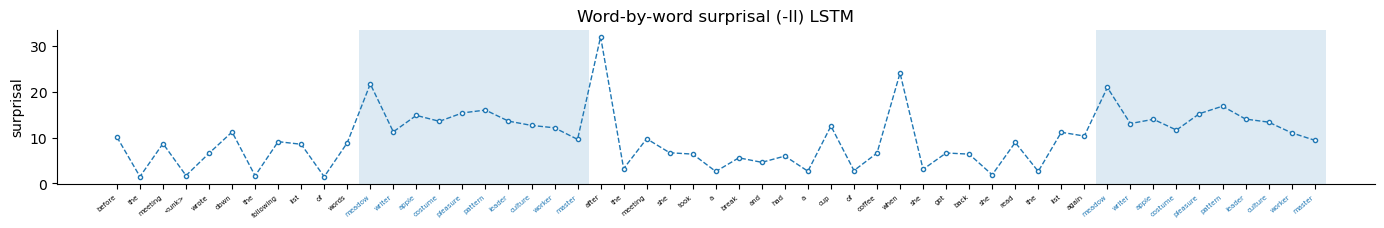

In [18]:
with plt.style.context("default"):
    f, a = plot_example(x=x, y=y, markers=m, xlabels=l, ylabel="surprisal", fh=2, fw=w_disp, title="Word-by-word surprisal (-ll) LSTM")

In [19]:
if savefigs:
    f.set_size_inches(w=w, h=h)
    f.savefig(os.path.join(savedir, "./example_rnn.pdf"), transparent=True, dpi=300, bbox_inches="tight")
    f.savefig(os.path.join(savedir, "./example_rnn.png"), dpi=300, bbox_inches="tight")

# Main figures

## Experiment 1 and 2: word order and semantic structure

### Workhorse function make_plot()

In [20]:
def make_plot(datain, x, style, col, title, xticks):
    
    # annotate
    x_levels = datain.loc[:, x].unique()          # x group
    col_levels = datain.loc[:, col].unique()      # column grouping
    style_levels = datain.loc[:, style].unique()
    
    # find n rows (observations) for one plotted group
    one_group = (datain[x] == x_levels[-1]) & (datain[style] == style_levels[0]) & (datain[col] == col_levels[0])
    n = len(datain.loc[one_group])  
    
    p = sns.relplot(kind="line", data=datain, x=x, y="surp", style=style, col=col, 
                    estimator=np.mean, ci=95.0, err_style="bars",
                    markers=False, style_order=["repeated", "permuted", "unseen"],
                    legend="auto", linewidth=0.7)
    
    p.fig.subplots_adjust(top=0.85)
    p.set_titles(col_template="{col_name} list of nouns")
    p.set_axis_labels("token position in list" , "mean surprisal\n(N={})".format(n))
    p.fig.suptitle("{}".format(title))
    
    p.set(xticks=xticks)
    p.despine(left=True);
    return p

In [21]:
# common fig properties
w, h, w_disp, h_disp = 10, 1.5, 17, 3

### Create data structure

In [22]:
data = pd.concat([data_gpt, data_rnn], ignore_index=True)

# rename some row variables for plotting
data.loc[data["list"]=="categorized", "list"] = "semantic"
data.loc[data["list"]=="random", "list"] = "arbitrary"
data.loc[data["second_list"]=="control", "second_list"] = "novel"
data.loc[data["second_list"]=="repeat", "second_list"] = "repeated"
data.loc[data["second_list"]=="permute", "second_list"] = "permuted"

In [23]:
context_len = 8
list_len = 10
context = "intact"

sel = (data.prompt_len==context_len) & \
      (data.list_len==list_len) & \
      (data.list.isin(["semantic", "arbitrary"])) & \
      (data.context==context) & \
      (data.model_id=="a-10") & \
      (data.marker.isin([2, 3])) & \
      (data.second_list.isin(["repeated", "permuted", "unseen"])) &\
      (data.marker_pos_rel.isin(list(range(-4, 10))))

In [24]:
d = data.loc[sel].copy()

# name column manually
d.rename(columns={"list": "list structure", "second_list": "condition"}, inplace=True)

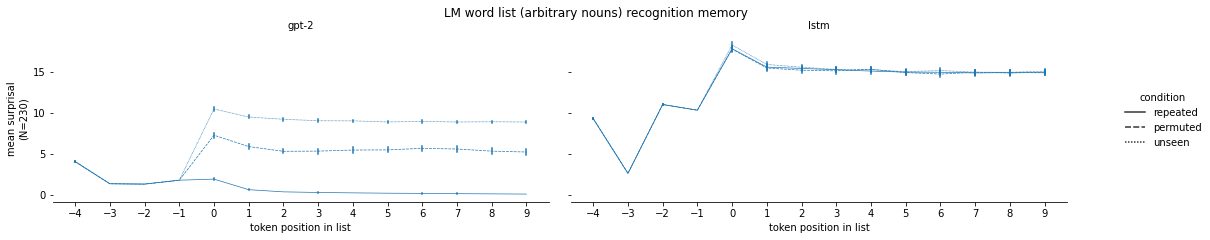

In [25]:
arch = "gpt-2"
p = make_plot(d.loc[d["model"] == arch], x="marker_pos_rel", style="condition", col="list structure", title="{}".format(arch), xticks=list(range(-4, 10)))
p.fig.set_size_inches(w=w_disp, h=h_disp)

In [26]:
if savefigs:
    p.fig.set_size_inches(w=w, h=h)
    p.fig.subplots_adjust(top=0.70)
    p.savefig(os.path.join(savedir, "word_order_{}_nouns.pdf".format(nouns)), transparent=True, bbox_inches="tight")
    p.savefig(os.path.join(savedir, "word_order_{}_nouns.png".format(nouns)), dpi=300, bbox_inches="tight")

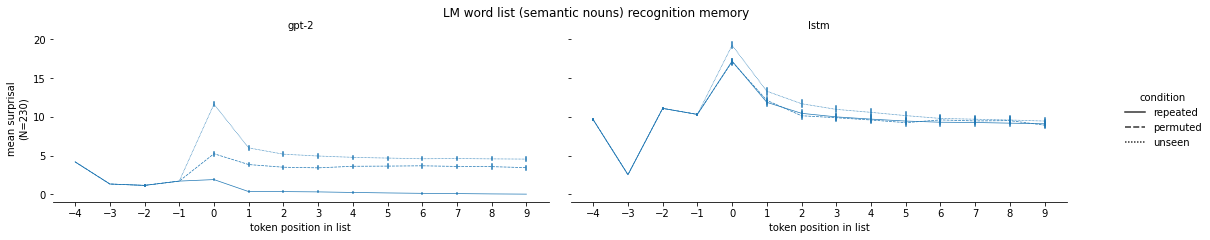

In [27]:
arch="lstm"
p = make_plot(d.loc[d["model"] == arch], x="marker_pos_rel", style="condition", col="list structure", title="{}".format(arch), xticks=list(range(-4, 10)))
p.fig.set_size_inches(w=w_disp, h=h_disp)

In [28]:
if savefigs:
    p.fig.set_size_inches(w=w, h=h)
    p.fig.subplots_adjust(top=0.70)
    p.savefig(os.path.join(savedir, "word_order_{}_nouns.pdf".format(nouns)), transparent=True, bbox_inches="tight")
    p.savefig(os.path.join(savedir, "word_order_{}_nouns.png".format(nouns)), dpi=300, bbox_inches="tight")

## Experiment 3: effect of list length

### Workhorse function make_bar_plot()

In [29]:
def make_bar_plot(data_frame, x, y, hue, col,
                  ylim=None, xlabel=None, ylabel=None, suptitle=None,
                  size_inches=(5, 3), legend=False, legend_out=False, legend_title=None, 
                  hue_order=["novel", "permuted", "repeated"], col_order=["arbitrary", "semantic"]):


    g = sns.catplot(data=data_frame, x=x, y=y, hue=hue, col=col, 
                    estimator=np.median, ci=95.0,
                    kind="bar", dodge=0.5, palette="tab10", zorder=2, legend=legend, legend_out=legend_out,
                    seed=12345,
                    hue_order=hue_order, col_order=col_order,
                    facecolor=(1, 1, 1, 0), edgecolor=["tab:gray"], ecolor=["tab:gray"], bottom=0, linewidth=1.3)
    
    ax = g.axes[0]

    # right panel
    select = (data_frame[col]==col_order[0])
    sns.stripplot(ax=ax[0], data=data_frame[select], x=x, y=y, hue=hue, hue_order=hue_order,
                  palette="pastel", dodge=0.5, alpha=0.05, zorder=1)

    # right panel
    select = (data_frame[col]==col_order[1])
    sns.stripplot(ax=ax[1], data=data_frame[select], x=x, y=y, hue=hue, hue_order=hue_order,
                  palette="pastel", dodge=0.5, alpha=0.05, zorder=1)

    # set labels
    ax[0].set_ylabel(ylabel)
    ax[1].set_ylabel("")
    ax[0].set_xlabel(xlabel)
    ax[1].set_xlabel(xlabel)
    
    # set ylim if needed
    if ylim is not None:
        ymin, ymax = ylim
        if ymin is None: ymin = ax[0].get_ylim()[0]
        if ymax is None: ymax = ax[0].get_ylim()[1]
        
        ax[0].set(ylim=(ymin, ymax))
    
    blue, orange, green = sns.color_palette("dark")[0:3]
    n_x_groups = len(data_frame[x].unique())
    for i in [0, 1]:
        for patch in ax[i].patches[0:n_x_groups]:
            patch.set_edgecolor(blue)
        for patch in ax[i].patches[n_x_groups:n_x_groups*2]:
            patch.set_edgecolor(orange)
        for patch in ax[i].patches[n_x_groups*2::]:
            patch.set_edgecolor(green)
    
    # annotate
    x_levels = data_frame.loc[:, x].unique()
    col_levels = data_frame.loc[:, col].unique()
    hue_levels = data_frame.loc[:, hue].unique()
    
    # find n rows for one plotted group
    one_group = (data_frame[x]==x_levels[0]) & (data_frame[hue]==hue_levels[0]) & (data_frame[col] == col_levels[0])
    n = len(data_frame.loc[one_group])  
    
    ax[0].text(x=ax[0].get_xlim()[0], y=ax[0].get_ylim()[-1]*0.9, s="N = {}".format(n))
    
    # find numerical values
    ci_vals = []
    for a in ax:
        d = {lab: [] for lab in hue_order}
        ci_vals.append({"{}-{}".format(lab, j): line.get_ydata()
                       for i, lab in enumerate(hue_order)
                       for j, line in enumerate(ax[0].lines[0+(i*len(hue_order)):n_x_groups+(i*len(hue_order))])}
                      )
    
    
    # legend
    # Improve the legend
    if not legend:
        ax[0].get_legend().remove()

        handles, labels = ax[1].get_legend_handles_labels()
        ax[1].legend(handles[0:3], labels[0:3],
                  handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1),
                  loc="upper left", ncol=1, frameon=False, title=legend_title)

    g.fig.suptitle("{}".format(suptitle))
    g.set_titles(col_template="{col_name} lists of nouns")
    g.despine(left=True)
    g.fig.set_size_inches(size_inches[0], size_inches[1])
    
    return g, ax, ci_vals

In [30]:
# Define function that computes relative change in average surprisal

def get_relative_change(x1=None, x2=None, labels1=None, labels2=None):
    
    """
    computes relative change across data in x1 and x2. Sizes of arrays x1 and x2
    should match.
    """
    
    # check that any labels match
    if (labels1 is not None) & (labels2 is not None):
        assert (labels1 == labels2).all()
    
    x_del = ((x2-x1)/(x1+x2))
    x_perc = (x2/x1)*100
    return x_del, x_perc

In [31]:
data = None
data = pd.concat([data_gpt, data_rnn])

In [32]:
# select repeat condition and all list lengths
context_len = 8                       # take only short context for now
list_len = [3, 5, 7, 10]              # this is on the x-axis
context = "intact"                    # only intact context (no permute, etc.)
token_positions = list(range(1, 10))  # only select non-initial token positions

# we drop the first token
sel = (data.prompt_len==context_len) & \
      (data.list_len.isin(list_len)) & \
      (data.second_list.isin(["repeat", "permute", "control"])) & \
      (data.list.isin(["random", "categorized"])) & \
      (data.context==context) & \
      (data.model_id=="a-10") & \
      (data.marker.isin([1, 3])) & \
      (data.marker_pos_rel.isin(token_positions))

d = data.loc[sel].copy()

### Now, we average over tokens in lists

In [33]:
# average separately per list_len, stimulus id (sentid), model (lstm or gpt2), marker (1 or 3), list (random, categorized) and second list (repeated, permuted or control)
units = ["list_len", "stimid", "model", "marker", "list", "second_list"]
dagg = d.groupby(units).agg({"surp": ["mean", "std"]}, {"token": list}).reset_index()
dagg.columns = ['_'.join(col_v) if col_v[-1] != '' else col_v[0] for col_v in dagg.columns.values]

### Compute difference ratio

In [34]:
# apply relatvie change computation and apply to 

df_list = []
for model in ["gpt-2", "lstm"]:
    for length in [3, 5, 7, 10]:
        for condition in ["repeat", "permute", "control"]:
            for list_type in ["categorized", "random"]:
            
                cols = ["x1", "x2", "x_del"]
                df = pd.DataFrame(columns=cols)

                select = (dagg.model == model) & (dagg.list_len == length) & (dagg.second_list == condition) & (dagg.list == list_type)
                tmp = dagg.loc[select].copy()

                x1=tmp.loc[tmp.marker==1].surp_mean.to_numpy()           # average per sentence surprisal on first list
                x2=tmp.loc[tmp.marker==3].surp_mean.to_numpy()           # average per sentence surprisal on second list
                labels1 = tmp.loc[tmp.marker==1].stimid.to_numpy()  # use sentence id for check
                labels2 = tmp.loc[tmp.marker==3].stimid.to_numpy()

                x_del, x_perc = get_relative_change(x1=x1, x2=x2, labels1=labels1, labels2=labels2)

                df["x1"] = x1
                df["x2"] = x2
                df["x_del"] = x_del
                df["x_perc"] = x_perc
                df["model"] = model
                df["list_len"] = length
                df["list"] = list_type
                df["condition"] = condition

                df_list.append(df)

In [35]:
# concatenate relative scores
data = None
data = pd.concat(df_list)

data.loc[data["list"]=="categorized", "list"] = "semantic"
data.loc[data["list"]=="random", "list"] = "arbitrary"
data.loc[data["condition"]=="control", "condition"] = "novel"
data.loc[data["condition"]=="repeat", "condition"] = "repeated"
data.loc[data["condition"]=="permute", "condition"] = "permuted"

In [36]:
plot_size=(6, 2.3)

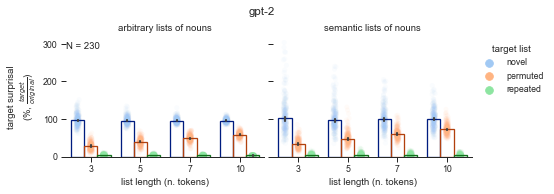

In [37]:
sns.set_style("ticks")
sns.set_context("paper")
arch = "gpt-2"
p1, a, ci = make_bar_plot(data_frame=data.loc[data.model==arch], 
                  x="list_len", y="x_perc", hue="condition", col="list", ylim=(None, None),
                  xlabel="list length (n. tokens)", ylabel="target surprisal\n(%, $\\frac{target}{original}$)", 
                  suptitle="{}".format(arch), 
                  legend=False, legend_out=False, legend_title="target list",
                  size_inches=plot_size)
p1.fig.subplots_adjust(top=0.8)

In [38]:
if savefigs:
    p1.savefig(os.path.join(savedir, "list_length_{}.pdf".format(arch)), transparent=True, bbox_inches="tight")
    p1.savefig(os.path.join(savedir, "list_length_{}.png".format(arch)), dpi=300, bbox_inches="tight")

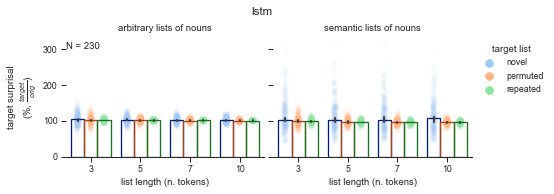

In [39]:
arch="lstm"
sns.set_style("ticks")
sns.set_context("paper")
p2, _, ci = make_bar_plot(data_frame=data.loc[data.model==arch], 
                  x="list_len", y="x_perc", hue="condition", col="list", ylim=(None, None),
                  xlabel="list length (n. tokens)", ylabel="target surprisal\n(%, $\\frac{target}{orig}$)", 
                  suptitle="{}".format(arch), legend_title="target list",
                  size_inches=plot_size)
p2.fig.subplots_adjust(top=0.8)

In [40]:
if savefigs:
    p2.savefig(os.path.join(savedir, "list_length_{}.pdf".format(arch)), transparent=True, bbox_inches="tight")
    p2.savefig(os.path.join(savedir, "list_length_{}.png".format(arch)), dpi=300, bbox_inches="tight")

## Experiment 4: effect of context length

### Prepare data

In [41]:
data = None
data = pd.concat([data_gpt, data_rnn])

In [42]:
# select repeat condition and all list lengths
context_len = [8, 100, 200, 400]
list_len = 10
context = "intact"
token_positions = list(range(1, 10))

# we drop the first token
sel = (data.prompt_len.isin(context_len)) & \
      (data.list_len.isin([list_len])) & \
      (data.second_list.isin(["repeat", "permute", "control"])) & \
      (data.list.isin(["random", "categorized"])) & \
      (data.context==context) & \
      (data.model_id=="a-10") & \
      (data.marker.isin([1, 3])) & \
      (data.marker_pos_rel.isin(token_positions))

d = data.loc[sel].copy()

### Do averaging and compute difference ratio

In [43]:
units = ["prompt_len", "stimid", "model", "marker", "list", "second_list"]
dagg = d.groupby(units).agg({"surp": ["mean", "std"], "token": list}).reset_index()
dagg.columns = ['_'.join(col_v) if col_v[-1] != '' else col_v[0] for col_v in dagg.columns.values]

In [44]:
# apply relative change computation and apply to 

df_list = []
for model in ["gpt-2", "lstm"]:
    for length in context_len:
        for condition in ["repeat", "permute", "control"]:
            for list_type in ["categorized", "random"]:
            
                cols = ["x1", "x2", "x_del"]
                df = pd.DataFrame(columns=cols)

                select = (dagg.model == model) & (dagg.prompt_len == length) & (dagg.second_list == condition) & (dagg.list==list_type)
                tmp = dagg.loc[select].copy()

                x1=tmp.loc[tmp.marker==1].surp_mean.to_numpy()           # average per sentence surprisal on first list
                x2=tmp.loc[tmp.marker==3].surp_mean.to_numpy()           # average per sentence surprisal on second list
                labels1 = tmp.loc[tmp.marker==1].stimid.to_numpy()  # use sentence id for check
                labels2 = tmp.loc[tmp.marker==3].stimid.to_numpy()

                x_del, x_perc = get_relative_change(x1=x1, x2=x2, labels1=labels2, labels2=labels2)

                df["x1"] = x1
                df["x2"] = x2
                df["x_del"] = x_del
                df["x_perc"] = x_perc
                df["model"] = model
                df["prompt_len"] = length
                df["list"] = list_type
                df["condition"] = condition

                df_list.append(df)

In [45]:
# concatenate relative scores
data = None
data = pd.concat(df_list)

In [46]:
data.loc[data["list"]=="categorized", "list"] = "semantic"
data.loc[data["list"]=="random", "list"] = "arbitrary"
data.loc[data["condition"]=="control", "condition"] = "novel"
data.loc[data["condition"]=="repeat", "condition"] = "repeated"
data.loc[data["condition"]=="permute", "condition"] = "permuted"

### Plot

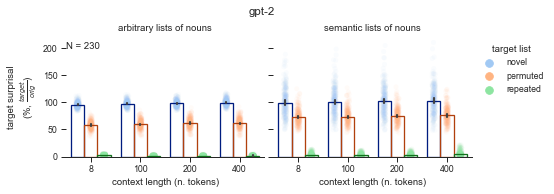

In [47]:
arch="gpt-2"
sns.set_style("ticks")
sns.set_context("paper")
plot_size = (6, 2.3)
p3, _, ci = make_bar_plot(data_frame=data.loc[data.model==arch], 
                      x="prompt_len", y="x_perc", hue="condition", col="list", ylim=(None, None),
                      xlabel="context length (n. tokens)", ylabel="target surprisal\n(%, $\\frac{target}{orig}$)", 
                      suptitle="{}".format(arch), legend_title="target list",
                      size_inches=plot_size)
p3.fig.subplots_adjust(top=0.8)

In [48]:
if savefigs:
    p3.savefig(os.path.join(savedir, "context_length_{}.pdf".format(arch)), transparent=True, bbox_inches="tight")
    p3.savefig(os.path.join(savedir, "context_length_{}.png".format(arch)), dpi=300, bbox_inches="tight")

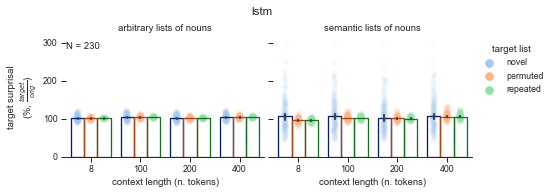

In [49]:
arch="lstm"
sns.set_style("ticks")
sns.set_context("paper")
p4, _, ci = make_bar_plot(data_frame=data.loc[data.model==arch], 
                          x="prompt_len", y="x_perc", hue="condition", col="list",  ylim=(None, None),
                          xlabel="context length (n. tokens)", ylabel="target surprisal\n(%, $\\frac{target}{orig}$)", 
                          suptitle="{}".format(arch), legend_title="target list",
                          size_inches=plot_size)
p4.fig.subplots_adjust(top=0.8)

In [50]:
if savefigs:
    p4.savefig(os.path.join(savedir, "context_length_{}.pdf".format(arch)), transparent=True, bbox_inches="tight")
    p4.savefig(os.path.join(savedir, "context_length_{}.png".format(arch)), dpi=300,  bbox_inches="tight")

## Experiment 5: Effect of context structure

### load scenario 1, 2 and 1rnd data

In [51]:
gptlst = []
rnnlst = []
for sce in ["sce1", "sce2", "sce1rnd"]:
    rnn = pd.read_csv(os.path.join(data_dir, "output_rnn_a-10_{}.csv".format(sce)), sep="\t", index_col=None)
    rnn.rename(columns={"word":"token"}, inplace=True)
    rnnlst.append(rnn)
    gptlst.append(pd.read_csv(os.path.join(data_dir, "output_gpt2_a-10_{}.csv".format(sce)), sep="\t", index_col=0))

data_gpt = pd.concat(gptlst)
data_rnn = pd.concat(rnnlst)
data_gpt["model"] = "gpt-2"
data_rnn["model"] = "lstm"

C:\Users\karmeni1\Miniconda3\envs\ptorch1.6\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [52]:
data = None
data = pd.concat([data_gpt, data_rnn])

In [53]:
# select repeat condition and all list lengths
context_len = [400]
list_len = [10]
context = ["intact", 'scrambled', 'incongruent']
token_positions = list(range(1, 10))

# we drop the first token
sel = (data.prompt_len.isin(context_len)) & \
      (data.list_len.isin(list_len)) & \
      (data.second_list.isin(["repeat", "permute", "control"])) & \
      (data.list.isin(["random", "categorized"])) & \
      (data.context.isin(context)) & \
      (data.model_id=="a-10") & \
      (data.marker.isin([1, 3])) & \
      (data.marker_pos_rel.isin(token_positions))

d = data.loc[sel].copy()

In [54]:
units = ["context", "prompt_len", "stimid", "model", "marker", "list", "second_list"]
dagg = d.groupby(units).agg({"surp": ["mean", "std"], "token": list}).reset_index()
dagg.columns = ['_'.join(col_v) if col_v[-1] != '' else col_v[0] for col_v in dagg.columns.values]

In [55]:
df_list = []
for model in ["gpt-2", "lstm"]:
    for context in ["intact", 'scrambled', 'incongruent']:
        for condition in ["repeat", "permute", "control"]:
            for list_type in ["categorized", "random"]:
            
                df = pd.DataFrame(columns=cols)

                select = (dagg.model == model) & (dagg.context == context) & (dagg.second_list == condition) & (dagg.list==list_type)
                tmp = dagg.loc[select].copy()

                x1=tmp.loc[tmp.marker==1].surp_mean.to_numpy()           # average per sentence surprisal on first list
                x2=tmp.loc[tmp.marker==3].surp_mean.to_numpy()           # average per sentence surprisal on second list
                labels1 = tmp.loc[tmp.marker==1].stimid.to_numpy()  # use sentence id for check
                labels2 = tmp.loc[tmp.marker==3].stimid.to_numpy()

                x_del, x_perc = get_relative_change(x1=x1, x2=x2, labels1=labels2, labels2=labels2)

                df["x1"] = x1
                df["x2"] = x2
                df["x_del"] = x_del
                df["x_perc"] = x_perc
                df["model"] = model
                df["context"] = context
                df["list"] = list_type
                df["condition"] = condition

                df_list.append(df)

In [56]:
# concatenate relative scores
data = None
data = pd.concat(df_list)

In [57]:
data.loc[data["list"]=="categorized", "list"] = "semantic"
data.loc[data["list"]=="random", "list"] = "arbitrary"
data.loc[data["condition"]=="control", "condition"] = "novel"
data.loc[data["condition"]=="repeat", "condition"] = "repeated"
data.loc[data["condition"]=="permute", "condition"] = "permuted"

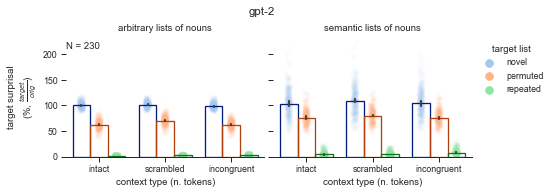

In [58]:
arch="gpt-2"
sns.set_style("ticks")
sns.set_context("paper")
plot_size = (6, 2.3)
p3, ax, ci = make_bar_plot(data_frame=data.loc[data.model==arch], 
                      x="context", y="x_perc", hue="condition", col="list", ylim=(None, None),
                      xlabel="context type (n. tokens)", ylabel="target surprisal\n(%, $\\frac{target}{orig}$)", 
                      suptitle="{}".format(arch), legend_title="target list",
                      size_inches=plot_size)
p3.fig.subplots_adjust(top=0.8)

In [59]:
if savefigs:
    p3.savefig(os.path.join(savedir, "context_type_{}.pdf".format(arch)), transparent=True, bbox_inches="tight")
    p3.savefig(os.path.join(savedir, "context_type_{}.png".format(arch)), dpi=300, bbox_inches="tight")

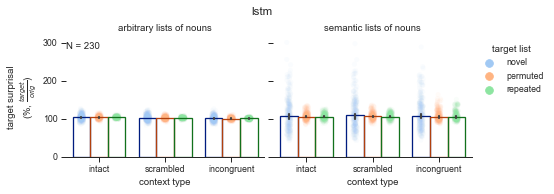

In [60]:
arch="lstm"
sns.set_style("ticks")
sns.set_context("paper")
plot_size = (6, 2.3)
p4, _, ci = make_bar_plot(data_frame=data.loc[data.model==arch], 
                          x="context", y="x_perc", hue="condition", col="list", ylim=(None, None),
                          xlabel="context type", ylabel="target surprisal\n(%, $\\frac{target}{orig}$)", 
                          suptitle="{}".format(arch), legend_title="target list",
                          size_inches=plot_size)
p4.fig.subplots_adjust(top=0.8)

In [61]:
if savefigs:
    p4.savefig(os.path.join(savedir, "context_type_{}.pdf".format(arch)), transparent=True, bbox_inches="tight")
    p4.savefig(os.path.join(savedir, "context_type_{}.png".format(arch)), dpi=300,  bbox_inches="tight")

## Experiment 6: effect of short context

In [62]:
#gpt = pd.read_csv(os.path.join(data_dir, "output_gpt-2_r-10_sce1.csv".format(sce)), sep="\t", index_col=None)

In [63]:
def make_bar_plot2(data_frame, x, y, hue, col,
                   xlabel=None, ylabel=None, suptitle=None,
                   size_inches=(5, 3), legend_title=None, hue_order=["novel", "permuted", "repeated"], col_order=["arbitrary", "semantic"]):

    g = sns.catplot(data=data_frame, x=x, y=y, hue=hue, col=col,
                    kind="bar", dodge=0.5, palette="tab10", zorder=2, legend=False, seed=12345,
                    hue_order=hue_order, col_order=col_order,
                    facecolor=(1, 1, 1, 0), edgecolor=["tab:gray"], ecolor=["tab:gray"], bottom=0, linewidth=1.3)
    
    ax = g.axes[0]

    # add point clouds for arbitary
    select = (data_frame.model=="lstm") & (data_frame.list==col_order[0])
    sns.stripplot(ax=ax[0], data=data_frame[select], x=x, y=y, hue=hue, hue_order=hue_order,
                  palette="pastel", dodge=0.5, alpha=0.08, zorder=1)
    
    # add pointlouds for rigth column
    select = (data_frame.model=="lstm") & (data_frame.list==col_order[1])
    sns.stripplot(ax=ax[1], data=data_frame[select], x=x, y=y, hue=hue, hue_order=hue_order,
                  palette="pastel", dodge=0.5, alpha=0.06, zorder=1)

    # set labels
    ax[0].set_ylabel(ylabel)
    ax[1].set_ylabel("")
    ax[0].set_xlabel(xlabel)
    ax[1].set_xlabel(xlabel)
    
    blue, orange, green = sns.color_palette("dark")[0:3]
    n_x_groups = len(data_frame[x].unique())
    for i in [0, 1]:
        for patch in ax[i].patches[0:n_x_groups]:
            patch.set_edgecolor(blue)
        for patch in ax[i].patches[n_x_groups:n_x_groups*2]:
            patch.set_edgecolor(orange)
        for patch in ax[i].patches[n_x_groups*2::]:
            patch.set_edgecolor(green)

    # annotate
    x_levels = data_frame.loc[:, x].unique()
    col_levels = data_frame.loc[:, col].unique()
    hue_levels = data_frame.loc[:, hue].unique()
    
    # find n rows for one plotted group
    one_group = (data_frame[x]==x_levels[0]) & (data_frame[hue]==hue_levels[0]) & (data_frame[col] == col_levels[0])
    n = len(data_frame.loc[one_group])  
    
    ax[0].text(x=ax[0].get_xlim()[0], y=ax[0].get_ylim()[0]*0.9, s="N = {}".format(n))
    
    # Improve the legend 
    ax[1].get_legend().remove()

    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles[0:3], labels[0:3],
                handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1),
                loc="upper left", ncol=1, frameon=False, title="target list")

    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle("{}".format(suptitle))
    g.set_titles(col_template="{col_name} lists of nouns")
    g.despine(left=True)
    g.fig.set_size_inches(size_inches[0], size_inches[1])
    
    return g, ax

In [64]:
rnn = pd.read_csv(os.path.join(data_dir, "output_rnn_a-10_sce3.csv".format(sce)), sep="\t", index_col=None)
rnn.rename(columns={"word":"token"}, inplace=True)

In [65]:
data = None
data = rnn
data["model"] = "lstm"

In [66]:
# select repeat condition and all list lengths
context_len = 8
list_len = [3, 5, 7, 10]
context = "short"

# we drop the first token
sel = (data.prompt_len==context_len) & \
      (data.list_len.isin(list_len)) & \
      (data.second_list.isin(["repeat", "permute", "control"])) & \
      (data.list.isin(["random", "categorized"])) & \
      (data.context==context) & \
      (data.model_id=="a-10") & \
      (data.marker.isin([0, 1, 2, 3]))

d = data.loc[sel].copy()

### Random GPT-2

## Plot a time course

In [67]:
sent_id=120
second_list="control"
list_type="categorized"
sel = (d.stimid==sent_id) & (d.second_list==second_list) & (d.list_len==10) & (d.list==list_type)
x = d.loc[sel].reset_index().index.values
y = d.loc[sel].surp.to_numpy()
m = d.loc[sel].marker.to_numpy()
l = d.loc[sel].token.to_numpy()

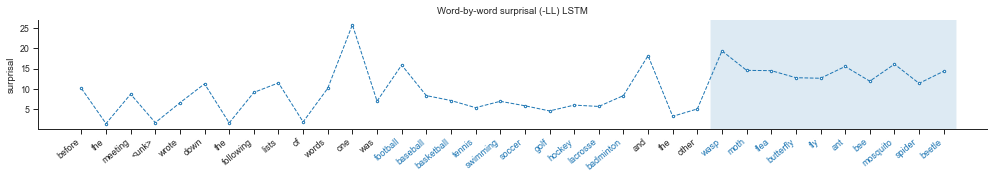

In [68]:
f, a = plt.subplots(figsize=(w_disp, 2))
a.plot(x, y, marker=".", markerfacecolor="white", linestyle="--", linewidth=1)


x_rect = np.where(l==l[m==3][0])[0]
y_rect = a.get_ylim()[0]

for i, xloc in enumerate(x_rect):             
    a.add_patch(Rectangle(xy=(xloc-0.5, y_rect), width=len(l[m==1]), height=a.get_ylim()[-1]+0.5, 
                           edgecolor=None, facecolor="tab:blue", alpha=0.15))

a.set_xticks(x);
a.set_xticklabels(l, rotation=40, fontsize=9, ha="right");

bluewords = d.loc[sel].marker.isin([1, 3]).to_numpy()

[t.set_color("tab:blue") for i, t in enumerate(a.xaxis.get_ticklabels()) if bluewords[i]]

a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)

a.set(ylabel="surprisal", title="Word-by-word surprisal (-LL) LSTM");

In [69]:
if savefigs:
    f.set_size_inches(w, h)
    f.savefig(os.path.join(savedir, "example_short_context_{}_nouns.pdf".format(list_type)), transparent=True, bbox_inches="tight")
    f.savefig(os.path.join(savedir, "example_short_context_{}_nouns.png".format(list_type)), dpi=300, bbox_inches="tight")

In [70]:
units = ["list_len", "stimid", "model", "marker", "list", "second_list"]
dagg = d.groupby(units).agg({"surp": ["median", "std"], "token": list}).reset_index()
dagg.columns = ['_'.join(col_v) if col_v[-1] != '' else col_v[0] for col_v in dagg.columns.values]

In [71]:
# apply relative change computation and apply to 

df_list = []
for model in ["lstm"]:
    for length in [3, 5, 7, 10]:
        for condition in ["repeat", "permute", "control"]:
            for list_type in ["categorized", "random"]:
            
                df = pd.DataFrame(columns=cols)

                select = (dagg.model == model) & (dagg.list_len == length) & (dagg.second_list == condition) & (dagg.list==list_type)
                tmp = dagg.loc[select].copy()

                x1=tmp.loc[tmp.marker==1].surp_median.to_numpy()           # average per sentence surprisal on first list
                x2=tmp.loc[tmp.marker==3].surp_median.to_numpy()           # average per sentence surprisal on second list
                labels1 = tmp.loc[tmp.marker==1].stimid.to_numpy()         # use sentence id for check
                labels2 = tmp.loc[tmp.marker==3].stimid.to_numpy()

                x_del, x_perc = get_relative_change(x1=x1, x2=x2, labels1=labels1, labels2=labels2)

                df["x1"] = x1
                df["x2"] = x2
                df["x_del"] = x_del
                df["x_perc"] = x_perc
                df["model"] = model
                df["list_len"] = length
                df["list"] = list_type
                df["condition"] = condition

                df_list.append(df)

In [72]:
# concatenate relative scores
data = None
data = pd.concat(df_list)

In [73]:
data.loc[data["list"]=="categorized", "list"] = "semantic"
data.loc[data["list"]=="random", "list"] = "arbitrary"
data.loc[data["condition"]=="control", "condition"] = "novel"
data.loc[data["condition"]=="repeat", "condition"] = "repeated"
data.loc[data["condition"]=="permute", "condition"] = "permuted"

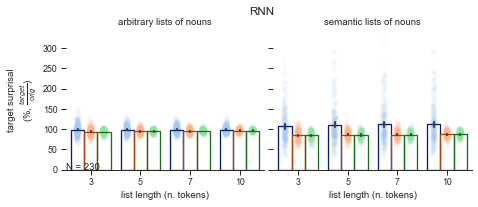

In [74]:
p5, _ = make_bar_plot2(data_frame=data, 
                      x="list_len", y="x_perc", hue="condition", col="list",
                      xlabel="list length (n. tokens)", ylabel="target surprisal\n(%, $\\frac{target}{orig}$)", 
                      suptitle="RNN", legend_title="target list",
                      size_inches=(6, 2.5))

In [75]:
if savefigs:
    p5.savefig(os.path.join(savedir, "short_context_rnn.pdf".format(list_type)), transparent=True, bbox_inches="tight")
    p5.savefig(os.path.join(savedir, "short_context_rnn.png".format(list_type)), dpi=300, bbox_inches="tight")

## Experiment 6: n-gram experiment

In [76]:
# select appropriate rows
selection = (data_rnn.list=="ngram-random") & (data_rnn.marker.isin([1, 2])) & (data_rnn.model_id=="a-10")
rnn = data_rnn.loc[selection].copy()

drop = ["prompt_len", "list_len", "context", "second_list"]
rnn.drop(columns=drop + ["hs", "dHs"], inplace=True)

In [77]:
selection = (data_gpt.list=="ngram-random") & (data_gpt.marker.isin([1, 2])) & (data_gpt.model_id=="a-10")
gpt = data_gpt.loc[selection].copy()
gpt.drop(columns=drop, inplace=True)

In [78]:
# <subtok_markers> keeps track of markers, crename columns to make it consistent downstream
newcolnames = {"subtok_markers": "marker", "marker": "marker_old"}
gpt.rename(columns=newcolnames, inplace=True)

In [79]:
newtypes = {"ngram_len": int, "dist_len": int, "stimid": int}
gpt = gpt.astype(newtypes)
rnn = rnn.astype(newtypes)

### Count n-gram positions (for x-axis)

In [80]:
# let's create a ngram position counter
def add_ngram_columns(data_frame):
    
    df= None
    df = data_frame.copy()
    
    col = []
    col2 = []
    
    for ngram_len in df.ngram_len.unique():
        
        for dist_len in df.dist_len.unique():
            
            for stimid in df.stimid.unique():
                
                sel = (df.ngram_len==ngram_len) & (df.dist_len==dist_len) & (df.stimid==stimid)
                tmp = df.loc[sel]
                
                repetitions = 5
                listlen = len(tmp)
                ngram = int(tmp.ngram_len.iloc[0])
                dist = int(tmp.dist_len.iloc[0])
                
                ngram_pos = np.repeat(np.arange(0, repetitions), ngram+dist) + 1
                token_pos = np.tile(np.arange(0, ngram+dist), repetitions) + 1
                if dist != 0:
                    ngram_pos = ngram_pos[:-dist]
                    token_pos = token_pos[:-dist]

                col.append(ngram_pos) # index ngram position withing sequence
                col2.append(token_pos)  # index tokens

    df["ngram_pos"] = np.concatenate(col)
    df["token_pos"] = np.concatenate(col2)
    
    return df

In [81]:
rnn = add_ngram_columns(rnn)

In [82]:
gpt = add_ngram_columns(gpt)

### Plot some trial trime courses for n-grams 

In [83]:
def plot_trial(data, sentence_id, ngram_len, dist_len, ylabel, title=None, size_inches=(10, 2)):
    
    sel = (data.stimid == sentence_id) & (data.ngram_len == ngram_len) & (data.dist_len == dist_len)
    
    x = data.loc[sel].reset_index().index.values
    y = data.loc[sel].surp.to_numpy()
    l = data.loc[sel].token.to_numpy()
    groups = data.loc[sel].ngram_pos
    markers = data.loc[sel].marker
    
    last_tok = l[(markers == 1) & (groups == 1)].tolist()[-1]
    
    f, ax = plt.subplots(figsize=size_inches)
    
    ax.plot(x, y, marker=".", markerfacecolor="white", linestyle="--", linewidth=1)
    
    n_rect = groups[markers == 1].unique()
    x_rect = np.where(l==l[0])[0]
    y_rect = ax.get_ylim()[0]
    
    for j, rect in enumerate(n_rect):
        ax.add_patch(Rectangle(xy=(x_rect[j]-0.5, y_rect), width=ngram_len, height=ax.get_ylim()[-1], 
                               edgecolor=None, facecolor="tab:blue", alpha=0.15))
    
    #ax.vlines(x=np.where(l==l[0]), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color="r", linestyle="--", linewidth=1)
    #ax.vlines(x=np.where(l==last_tok), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color="r", linestyle="--", linewidth=1)
    
    ax.set_xticks(x);
    #ax.get_xticks().set_visible(True)
    ax.set_xticklabels(l, rotation=40, fontsize=10, ha="center");

    highlightwords = (markers == 2).to_numpy()

    [t.set_color("tab:gray") for i, t in enumerate(ax.xaxis.get_ticklabels()) if highlightwords[i]]

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set(ylabel=ylabel, title=title);
    
    return f, ax

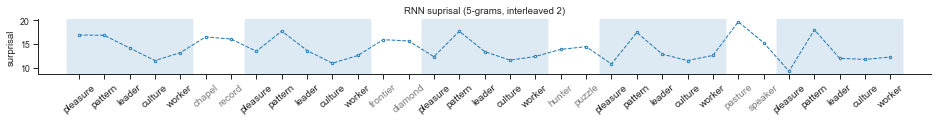

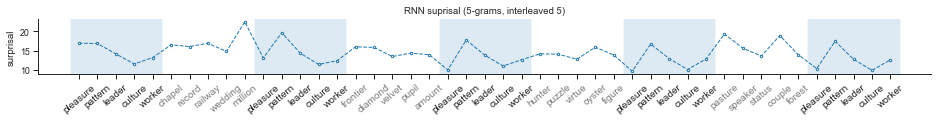

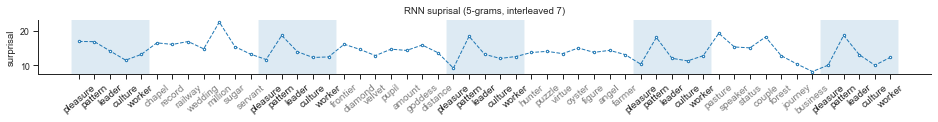

In [84]:
data=None
data=rnn
sentid=10
w, h = 16, 1
f1, a1 = plot_trial(data=data, sentence_id=sentid, ngram_len=5, dist_len=2, ylabel="surprisal", title="RNN suprisal (5-grams, interleaved 2)", size_inches=(16, 1))
f2, a2 = plot_trial(data=data, sentence_id=sentid, ngram_len=5, dist_len=5, ylabel="surprisal", title="RNN suprisal (5-grams, interleaved 5)", size_inches=(16, 1))
f3, a3 = plot_trial(data=data, sentence_id=sentid, ngram_len=5, dist_len=7, ylabel="surprisal", title="RNN suprisal (5-grams, interleaved 7)", size_inches=(16, 1))

if savefigs:
    
    for i, fig in enumerate((f1, f2, f3)):
        fig.set_size_inches(w, h)
        fig.savefig(os.path.join(savedir, "5-gram_example_RNN_arbitrary_nouns_{}.pdf".format(i)), transparent=True, bbox_inches="tight")
        fig.savefig(os.path.join(savedir, "5-gram_example_RNN_arbitrary_nouns_{}.png".format(i)), dpi=300, bbox_inches="tight")

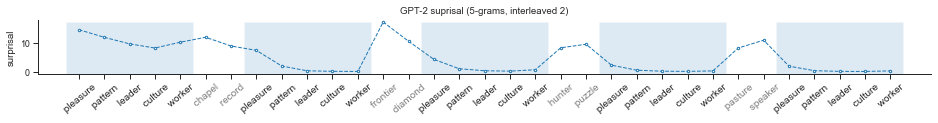

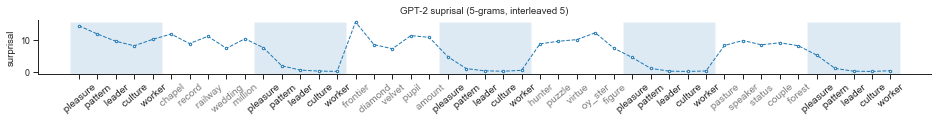

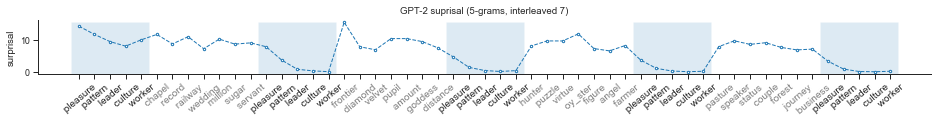

In [85]:
data=None
data=gpt
sentid=10
w, h = 16, 1
f1, a1 = plot_trial(data=data, sentence_id=sentid, ngram_len=5, dist_len=2, ylabel="surprisal", title="GPT-2 suprisal (5-grams, interleaved 2)", size_inches=(16, 1))
f2, a2 = plot_trial(data=data, sentence_id=sentid, ngram_len=5, dist_len=5, ylabel="surprisal", title="GPT-2 suprisal (5-grams, interleaved 5)", size_inches=(16, 1))
f3, a3 = plot_trial(data=data, sentence_id=sentid, ngram_len=5, dist_len=7, ylabel="surprisal", title="GPT-2 suprisal (5-grams, interleaved 7)", size_inches=(16, 1))

if savefigs:
    
    for i, fig in enumerate((f1, f2, f3)):
        fig.set_size_inches(w, h)
        fig.savefig(os.path.join(savedir, "5-gram_example_GPT-2_arbitrary_nouns_{}.pdf".format(i)), transparent=True, bbox_inches="tight")
        fig.savefig(os.path.join(savedir, "5-gram_example_GPT-2_arbitrary_nouns_{}.png".format(i)), dpi=300, bbox_inches="tight")

### Averaging per ngram position

In [86]:
rnnsel = rnn.loc[rnn.marker == 1].copy()
rnn_agg = rnnsel.groupby(["model", "ngram_len", "dist_len", "ngram_pos", "stimid"]) \
               .agg({"surp": ["mean", "std"], "token": list}) \
               .reset_index()
rnn_agg.columns = ['_'.join(col_v) if col_v[-1] != '' else col_v[0] for col_v in rnn_agg.columns.values]

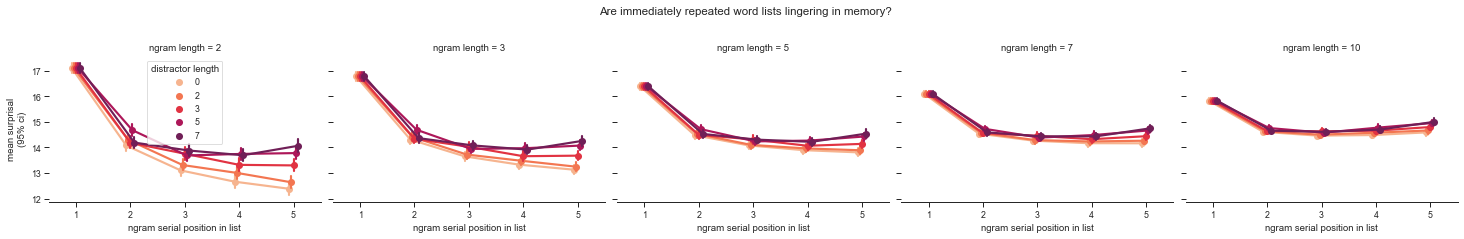

In [87]:
p = sns.catplot(data=rnn_agg, kind="point", x="ngram_pos", y="surp_mean", hue="dist_len", col="ngram_len",
                estimator=np.mean, ci=95.0, n_boot=1000, seed=12345,
                legend_out=False, dodge=0.15, sharey=True,
                palette=sns.color_palette("rocket_r"))
p.fig.set_size_inches(20, 3)  
p.fig.subplots_adjust(top=0.75)
p.fig.suptitle("Are immediately repeated word lists lingering in memory?")
p.set_axis_labels( "ngram serial position in list" , "mean surprisal\n(95% ci)")
p._legend.set_title("distractor length")
p.set_titles("ngram length = {col_name}")
p.despine(left=True);

In [88]:
if savefigs:
    p.savefig(os.path.join(savedir, "rnn_ngram.png"), dpi=300, bbox_inches="tight")
    p.savefig(os.path.join(savedir, "rnn_ngram.pdf"), transparent=True, bbox_inches="tight")

In [89]:
gptsel = gpt.loc[gpt.marker == 1].copy()
gpt_agg = gptsel.groupby(["model", "ngram_len", "dist_len", "ngram_pos", "stimid"]) \
               .agg({"surp": ["mean", "std"], "token": list}) \
               .reset_index()
gpt_agg.columns = ['_'.join(col_v) if col_v[-1] != '' else col_v[0] for col_v in gpt_agg.columns.values]

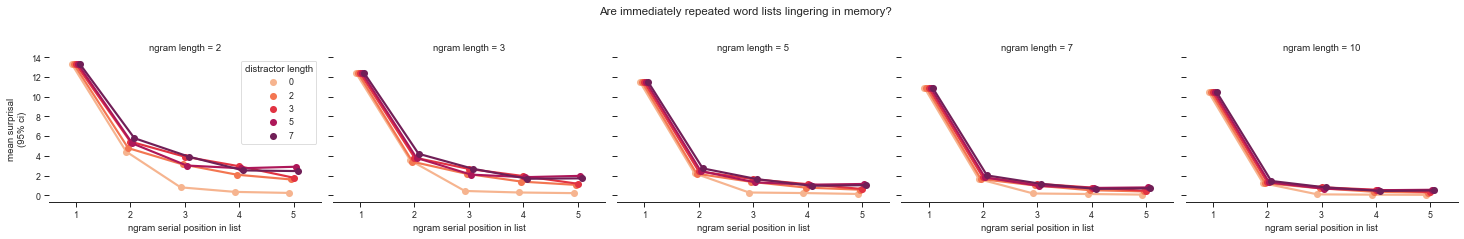

In [90]:
p = sns.catplot(data=gpt_agg, kind="point", x="ngram_pos", y="surp_mean", hue="dist_len", col="ngram_len",
                estimator=np.mean, ci=95.0, n_boot=1000, seed=12345,
                legend_out=False, dodge=0.15, sharey=True,
                palette=sns.color_palette("rocket_r"), )
p.fig.set_size_inches(20, 3)  
p.fig.subplots_adjust(top=0.75)
p.fig.suptitle("Are immediately repeated word lists lingering in memory?")
p.set_axis_labels( "ngram serial position in list" , "mean surprisal\n(95% ci)")
p._legend.set_title("distractor length")
p.set_titles("ngram length = {col_name}")
p.despine(left=True);

In [91]:
if savefigs:
    p.savefig(os.path.join(savedir, "gpt_ngram.png"), dpi=300, bbox_inches="tight")
    p.savefig(os.path.join(savedir, "gpt_ngram.pdf"), transparent=True, bbox_inches="tight")

## Per token position within ngram

In [92]:
gpt["model"] = "gpt-2"
rnn["model"] = "rnn"
data = rnn.loc[rnn.marker==1]

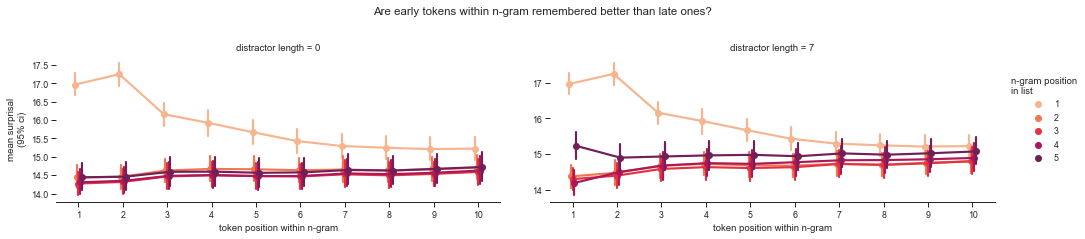

In [93]:
p = sns.catplot(data=data.loc[(data.ngram_len == 10) & (data.dist_len.isin([0, 7]))], kind="point", x="token_pos", y="surp", hue="ngram_pos", col="dist_len",
                estimator=np.mean, ci=95.0, n_boot=1000, seed=12345,
                legend_out=True, dodge=0.15, sharey=False,
                palette=sns.color_palette("rocket_r"))
p.fig.set_size_inches(15, 3)  
p.fig.subplots_adjust(top=0.75)
p.fig.suptitle("Are early tokens within n-gram remembered better than late ones?")
p.set_axis_labels("token position within n-gram", "mean surprisal\n(95% ci)")
p._legend.set_title(title="n-gram position\nin list")
p.set_titles("distractor length = {col_name}")
p.despine(left=True);

In [94]:
if savefigs:
    p.savefig(os.path.join(savedir, "rnn_ngram_per_position.png"), dpi=300, bbox_inches="tight")
    p.savefig(os.path.join(savedir, "rnn_ngram_per_position.pdf"), transparent=True, bbox_inches="tight")

In [95]:
data = gpt.loc[gpt.marker==1]

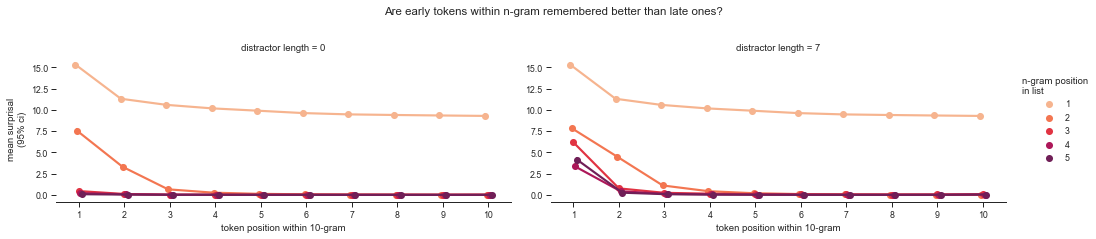

In [96]:
ngram=10
p = sns.catplot(data=data.loc[(data.ngram_len==ngram) & (data.dist_len.isin([0, 7]))], kind="point", x="token_pos", y="surp", hue="ngram_pos", col="dist_len",
                estimator=np.mean, ci=95.0, n_boot=1000, seed=12345,
                legend_out=True, dodge=0.15, sharey=False,
                palette=sns.color_palette("rocket_r"))
p.fig.set_size_inches(15, 3)  
p.fig.subplots_adjust(top=0.75)
p.fig.suptitle("Are early tokens within n-gram remembered better than late ones?")
p.set_axis_labels("token position within {}-gram".format(ngram), "mean surprisal\n(95% ci)")
p._legend.set_title(title="n-gram position\nin list")
p.set_titles("distractor length = {col_name}")
p.despine(left=True);

In [97]:
if savefigs:
    p.savefig(os.path.join(savedir, "gpt_ngram_per_position.png"), dpi=300, bbox_inches="tight")
    p.savefig(os.path.join(savedir, "gpt_ngram_per_position.pdf"), transparent=True, bbox_inches="tight")

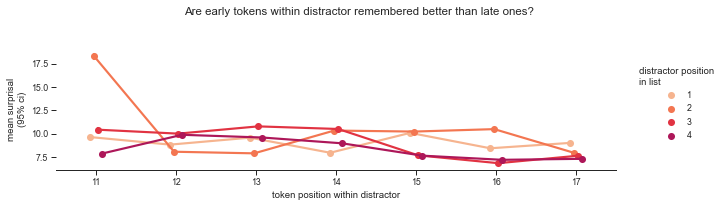

In [98]:
ngram=10
data=gpt.loc[gpt.marker==2]
p = sns.catplot(data=data.loc[(data.ngram_len==ngram) & (data.dist_len==7)], kind="point", x="token_pos", y="surp", hue="ngram_pos",
                estimator=np.mean, ci=95.0, n_boot=1000, seed=12345,
                legend_out=True, dodge=0.15, sharey=False,
                palette=sns.color_palette("rocket_r"))
p.fig.set_size_inches(10, 2.5)  
p.fig.subplots_adjust(top=0.75)
p.fig.suptitle("Are early tokens within distractor remembered better than late ones?")
p.set_axis_labels("token position within distractor", "mean surprisal\n(95% ci)".format(ngram))
p._legend.set_title(title="distractor position\nin list")
p.set_titles("distractor length = {col_name}")
p.despine(left=True);